<br><br>

## Exercício clusterização: clusters RFM

<br>

Analise de __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

O dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


def getData():
    return pd.read_csv("dataframe_clusterizacao_RFM.csv")

In [98]:
df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [99]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [100]:
def informacoes_colunas(df, lista_coluna):
    for coluna in lista_coluna:
        print("Coluna:", coluna, "\n")
        print("Tipo da variável:", df[coluna].dtype)
        print("\nPercentual de nulos:", df[coluna].isnull().sum()/df[coluna].shape[0], "%")
        print("\nValores Únicos:", df[coluna].unique())
        print("\nFrequência absoluta:\n", df[coluna].value_counts())
        print("\nProbabilidade geral:\n", round(df[coluna].value_counts()/df[coluna].shape[0],2))
        print("\n\n")
    
    print("\nCorrelação\n", df.corr())
    grafico_person(df = df, lista_coluna=lista_coluna)
    

In [101]:
def grafico_person(df, lista_coluna):
    #calculando a correlação entre elas
    corrs = df[lista_coluna].corr().values

    fig, ax = plt.subplots(figsize = [4,4])

    #Cria a imagem da matriz de correalções
    im = ax.imshow(corrs)

    #---- Até aqui já teriamos a visualização desejada, mas podemos customizar ainda mais:

    # Vamos colocar os nomes das colunas no eixo x e y:

    ax.set_xticks(np.arange(len(lista_coluna))) #define númeto de itens no eixo
    ax.set_yticks(np.arange(len(lista_coluna)))
    ax.set_xticklabels(lista_coluna) # nomeia os itens do eixo
    ax.set_yticklabels(lista_coluna)

    # Rotacionamos os nomes das colunas para não ficar um nome sobre o outro
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Título do gráfico
    ax.set_title("Correlação de Pearson")

    # Criando a barrinha ao lado para legenda das cores:
    cbar = ax.figure.colorbar(im, ax=ax) # im - cores, ax - itens do eixo
    cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
    plt.show()

In [102]:
def analise_dataset(df, lista_colunas=None):
    print("\nHead\n", df.head())
    print("\nDescribe\n", df.describe())
    print("\nInfo\n", df.info())
    print("\nShape\n", df.shape)
    print("\nCorrelação\n", df.corr())
    
    if(lista_colunas == None):
        grafico_person(df = df, lista_coluna=df.columns)
    else:
        grafico_person(df = df, lista_coluna=lista_colunas)
    


In [103]:
dff = df.copy()

Coluna: rec 

Tipo da variável: float64

Percentual de nulos: 0.0 %

Valores Únicos: [ 15.  51.  80.  38.  19.  75.  46.  25.  64.  39.  55.  53.  85.   1.
  52.  87.  66.  77.  10.  36.  48.  62.  21.  24.  72.  78.  79.  23.
  60.  88.  89.  43.  69.   8.  11.  76.  17.  90.  37.  83.  22.  34.
  68.  70.  42.   6.  14.  12.  28.  57.  44.  35.  49.   3.  86.  65.
  58.  16.  45.   4.  31.  73.   7.  50.  32.  18.  54.  20.   2.  71.
  84.  74.  59.  27.  41.  67.   5.  81.  26.   9.  47.  63.  40.  30.
  33. 118.  61.  82.  29.  13.  56. 101.]

Frequência absoluta:
 77.0     23
25.0     21
2.0      19
41.0     18
7.0      18
         ..
35.0      5
56.0      5
74.0      4
118.0     1
101.0     1
Name: rec, Length: 92, dtype: int64

Probabilidade geral:
 77.0     0.02
25.0     0.02
2.0      0.02
41.0     0.02
7.0      0.02
         ... 
35.0     0.00
56.0     0.00
74.0     0.00
118.0    0.00
101.0    0.00
Name: rec, Length: 92, dtype: float64



Coluna: freq 

Tipo da variável: float

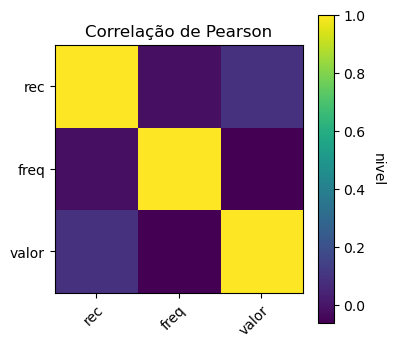

In [104]:
l = ['rec', 'freq', 'valor']

informacoes_colunas(dff, l)

Não é necessario fazer um preprocessamento, pois não precisa dropar colunas nulas ou preencher com media/moda.
A correlação entre as variaveis é muito baixa, mas irei fazer a analise mesmo assim.


Head
    user   rec  freq       valor
0     1  15.0   7.0  196.881015
1     2  51.0   6.0  162.408892
2     3  80.0   5.0  180.158644
3     4  38.0   4.0  156.048130
4     5  19.0   6.0  164.052067

Describe
               user          rec         freq        valor
count  1012.000000  1012.000000  1012.000000  1012.000000
mean    506.500000    45.064229     4.524704   109.568915
std     292.283538    26.471133     2.423586   125.013542
min       1.000000     1.000000     1.000000    10.859150
25%     253.750000    23.000000     2.000000    57.097928
50%     506.500000    45.000000     5.000000   103.561817
75%     759.250000    68.000000     7.000000   152.704398
max    1012.000000   118.000000    17.000000  3241.824119
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    1012 non-null   int64  
 1   rec     1012 non-null   float64
 2   freq    1

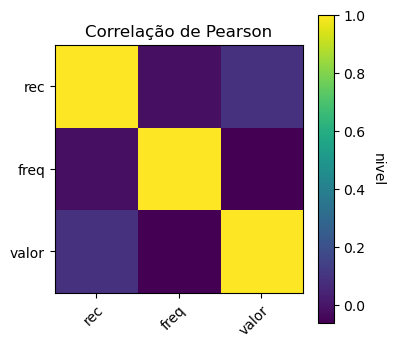

In [105]:
analise_dataset(dff, l)

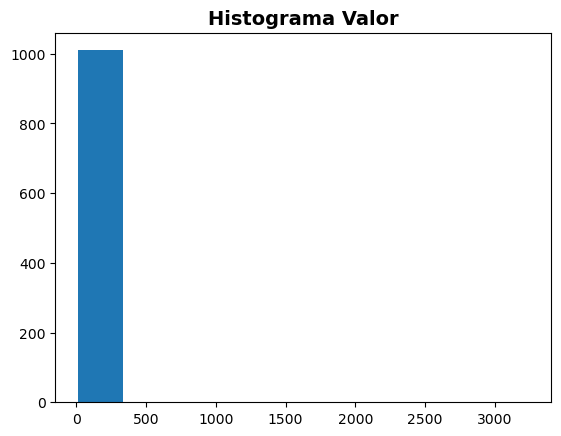

In [107]:
plt.title("Histograma Valor", fontsize = 14, fontweight = 'bold')
plt.hist(dff.valor)
plt.show()

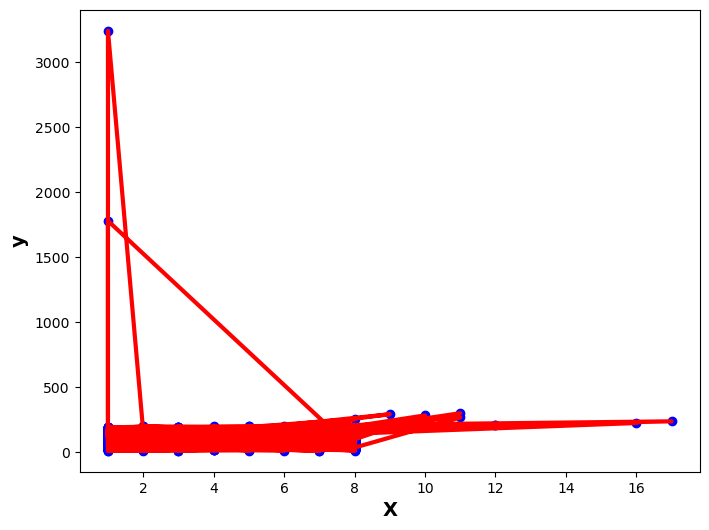

In [112]:
X = dff.freq
y = dff.valor

plt.figure(figsize=[8,6])
plt.scatter(X, y, c = 'blue')
plt.plot(X, y, c = 'red', lw = 3)
plt.xlabel("X", fontsize = 14, fontweight = 'bold')
plt.ylabel("y", fontsize = 14, fontweight = 'bold')
plt.show()

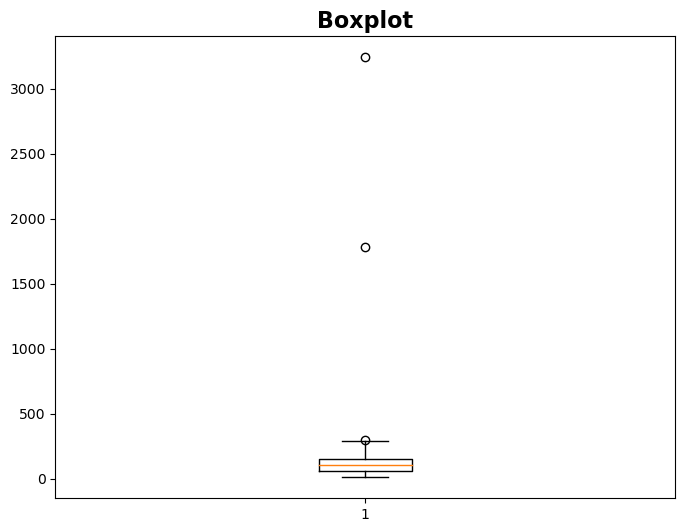

In [109]:
plt.figure(figsize=[8,6])
plt.title("Boxplot", fontsize = 16, fontweight = 'bold')
plt.boxplot(dff.valor)
plt.show()

In [110]:
dff['outlier_valor'] = detecta_outlier(x=dff.valor)
dff[dff.outlier_valor == 1]

,user,rec,freq,valor,outlier_valor
187,188,7.0,11.0,299.624773,1
303,304,118.0,1.0,1779.313280,1
645,646,101.0,1.0,3241.824119,1


Analisando o boxplot é possivel identificar 3 outliers. A principio o client 304 e 646 nao seriam clientes interessantes, tendo em vista que eles compraram uma vez só, apesar da compra ser de grande valor. Eles tem um rec muito alto.

In [131]:
dff_sem_outlier = dff[dff.outlier_valor == 0]

ss = StandardScaler()
Xss = ss.fit_transform(dff_sem_outlier[['rec', 'freq', 'valor']].values)

Xss

array([[-1.13920843,  1.02587518,  1.65372823],
       [ 0.2290169 ,  0.61133451,  1.035825  ],
       [ 1.33119842,  0.19679384,  1.35398437],
       ...,
       [ 0.19101064,  0.19679384, -0.09740052],
       [ 1.36920468, -1.04682818, -0.68184728],
       [-0.53110828, -1.04682818,  0.4403705 ]])

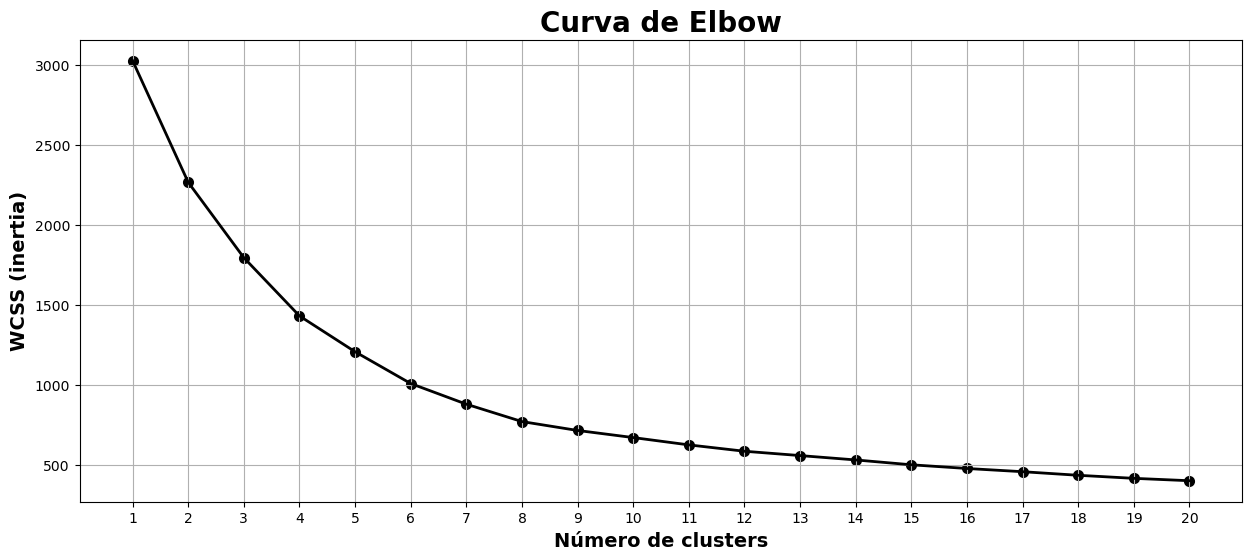

In [132]:
l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(Xss)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()


In [252]:
km = KMeans(n_clusters=2)
km.fit(Xss)

km.inertia_

2266.1020044408106

In [253]:
dfkm = dff_sem_outlier.copy()
dfkm['km_label'] = km.labels_
dfkm_groupby_labels = dfkm.groupby("km_label", group_keys=True).mean()

dfkm_groupby_labels

,user,rec,freq,valor,outlier_valor
km_label,,,,,
0,508.963810,66.744762,4.434286,109.966062,0.0
1,504.615702,21.359504,4.623967,98.823963,0.0


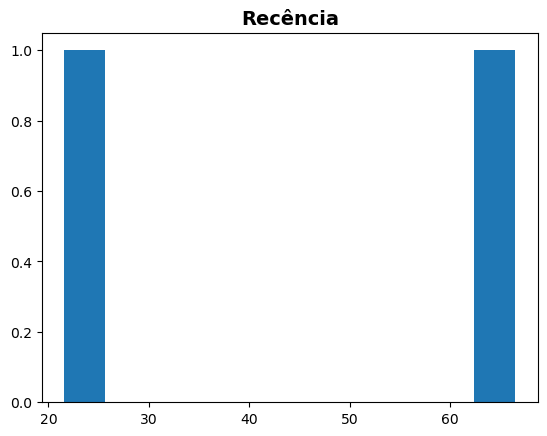

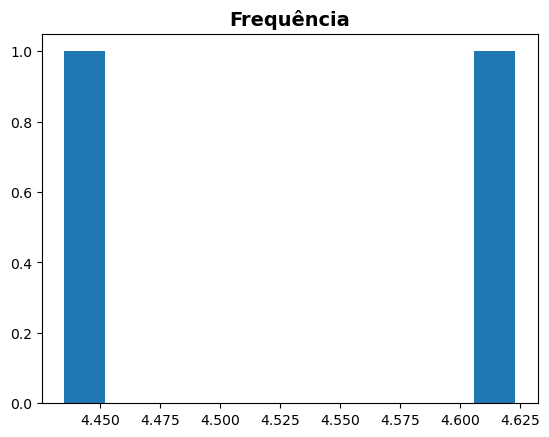

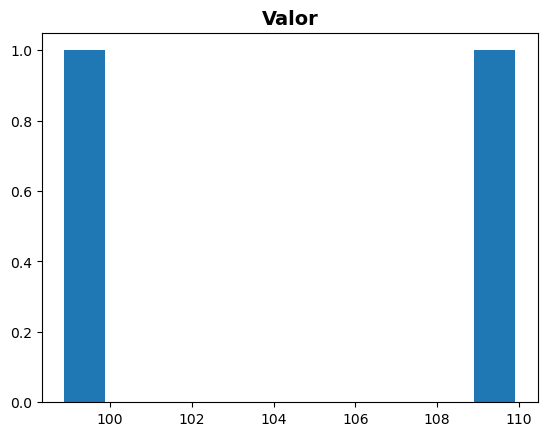

In [254]:
Xrec = dfkm_groupby_labels.rec.values

plt.title("Recência", fontsize = 14, fontweight = 'bold')
plt.hist(Xrec, rwidth=0.9)
plt.show()

Xfreq = dfkm_groupby_labels.freq.values

plt.title("Frequência", fontsize = 14, fontweight = 'bold')
plt.hist(Xfreq, rwidth=0.9)
plt.show()

Xvalor = dfkm_groupby_labels.valor.values

plt.title("Valor", fontsize = 14, fontweight = 'bold')
plt.hist(Xvalor, rwidth=0.9)
plt.show()

Segundo a curva de elbow, a principio o número de clusters ideal/otimizado são 6. Irei testar e comparar com clusters = 2

In [255]:
km = KMeans(n_clusters=6)
km.fit(Xss)

km.inertia_

1004.1585844233631

In [256]:
dfkm = dff_sem_outlier.copy()
dfkm['km_label'] = km.labels_
dfkm_groupby_labels = dfkm.groupby("km_label", group_keys=True).mean()

dfkm_groupby_labels

,user,rec,freq,valor,outlier_valor
km_label,,,,,
0,533.910615,58.653631,6.731844,55.452846,0.0
1,488.952381,68.653061,2.346939,70.300033,0.0
2,482.489655,25.717241,7.082759,148.910424,0.0
3,525.550265,18.206349,4.095238,54.368215,0.0
4,485.680000,28.508571,2.108571,149.656676,0.0
5,515.574713,72.580460,4.862069,156.582147,0.0


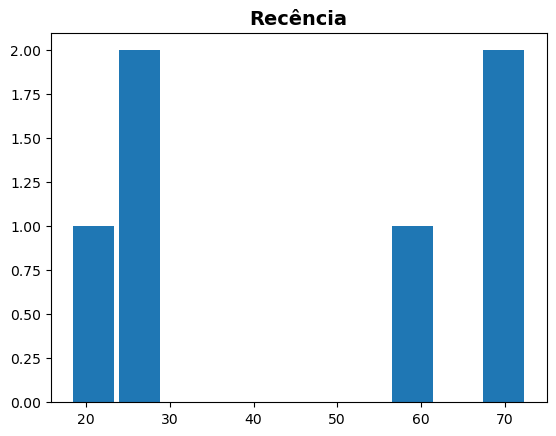

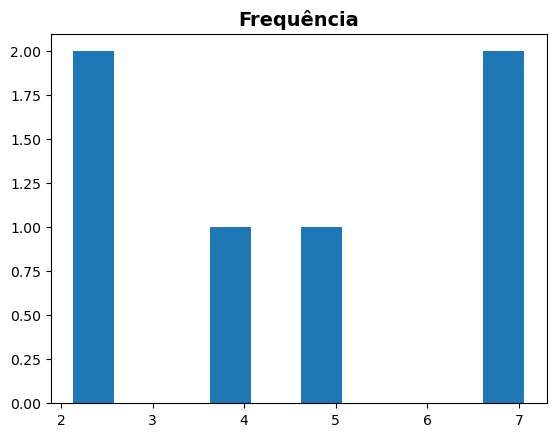

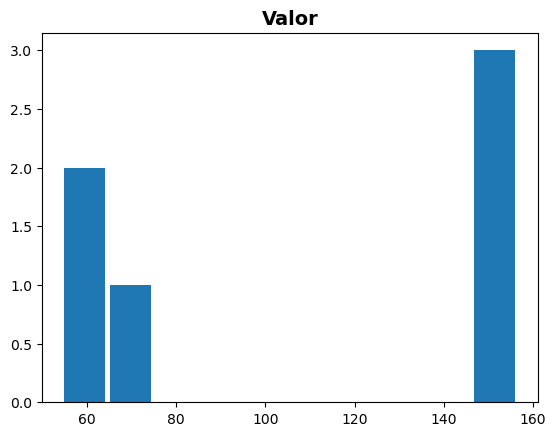

In [257]:
Xrec = dfkm_groupby_labels.rec.values

plt.title("Recência", fontsize = 14, fontweight = 'bold')
plt.hist(Xrec, rwidth=0.9)
plt.show()

Xfreq = dfkm_groupby_labels.freq.values

plt.title("Frequência", fontsize = 14, fontweight = 'bold')
plt.hist(Xfreq, rwidth=0.9)
plt.show()

Xvalor = dfkm_groupby_labels.valor.values

plt.title("Valor", fontsize = 14, fontweight = 'bold')
plt.hist(Xvalor, rwidth=0.9)
plt.show()

Considerações:

1 - Com 2 clusters a media deles são muito proximas, dando a entender que os dois grupos sao parecidos, logo que não tem muita variabilidade dos clientes(variando entre 99.288797 e 109.518044 o valor total de compra), ou seja, clientes que compram valores mais altos e clientes que compram valores mais baixos, ficando dificil decidir quais clientes são mais valorosos e menos valorosos para a empresa
    
2 - Já com 6 clusters, é possível ver claramente os grupos de clientes que sao mais valorosos e menos valorosos para a empresa. Grupo 0, 1 e 3 sendo os que gastam mais e o Grupo 2, 4 e 5 sendo que gasta menos. 
    
3 - Com 6 clusters é possível ver melhor a distribuição dos dados nos histogramas, podendo ver por exemplo, que 2 grupos tiveram uma frequencia baixa e 2 grupos uma frequencia alta.

In [316]:
for eps in np.arange(0.01, 10, 0.01):
    for min_samples in range(0,30,1):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(Xss)
        dfdb = dff_sem_outlier.copy()
        dfdb['db_labels'] = db.labels_

        #verifica se a frenquencia absoluta somanda de labels -1 e 0 ultrapassa 50
        if(dfdb[np.logical_or(dfdb.db_labels == -1, dfdb.db_labels == 0)].value_counts().sum() <= 50):
            #verifica se a quantidade de clusters é de até 20
            if(len(np.unique(db.labels_)) < 20):
                print("\neps=",eps)
                print("min_samples=",min_samples)
                print(dfdb.db_labels.value_counts())


Verificei a frenquencia absoluta somanda de labels -1 e 0 ultrapassa 50 de cada iteração, caso sim, descartaria a iteração. 50 eu achei um número aceitavel para um dataset de 1009 linhas. Depois, verifiquei se a quantidade de clusters retornada era até 20(que ja considerei extremamente alto), mas mesmo assim nao trouxe nenhum resultado, variando os eps de 0,01 até 10 e min_samples de 0 até 30.
Conclusão: Torna-se impraticavel a utilização do DBSCAN para esse dataset, pois mesmo fazendo esse número de iterações, com um tempo de execução extremamente grande, o modelo nao trouxe nenhum resultado favoravel. Por tanto, descartarei esse modelo nesta analise. 
